## Goal

Figure out how many training samples do we have to go from one tissue to another one

In [16]:
%matplotlib inline

In [1]:
vcf_file = '/s/project/gtex-processed/vcf/GTEx_Analysis_20150112_WholeGenomeSeq_148Indiv_GATK_HaplotypeCaller.vcf.gz'

In [2]:
count_file = '/s/project/gtex-processed/gene_counts_v7/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_reads.gct'

In [3]:
import pandas as pd

In [4]:
metadata = '/s/project/gtex-processed/gene_counts_v7/SraRunTable.txt'

In [5]:
md = pd.read_table(metadata)

In [31]:
counts = pd.read_table(count_file, skiprows=2)

In [36]:
# counts.to_feather('/s/project/gtex-processed/gene_counts_v7/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_reads.feather')

In [52]:
counts.columns

Index(['Description', 'GTEX-1117F-0226-SM-5GZZ7', 'GTEX-111CU-1826-SM-5GZYN',
       'GTEX-111FC-0226-SM-5N9B8', 'GTEX-111VG-2326-SM-5N9BK',
       'GTEX-111YS-2426-SM-5GZZQ', 'GTEX-1122O-2026-SM-5NQ91',
       'GTEX-1128S-2126-SM-5H12U', 'GTEX-113IC-0226-SM-5HL5C',
       'GTEX-117YX-2226-SM-5EGJJ',
       ...
       'GTEX-ZVE2-0006-SM-51MRW', 'GTEX-ZVP2-0005-SM-51MRK',
       'GTEX-ZVT2-0005-SM-57WBW', 'GTEX-ZVT3-0006-SM-51MT9',
       'GTEX-ZVT4-0006-SM-57WB8', 'GTEX-ZVTK-0006-SM-57WBK',
       'GTEX-ZVZP-0006-SM-51MSW', 'GTEX-ZVZQ-0006-SM-51MR8',
       'GTEX-ZXES-0005-SM-57WCB', 'GTEX-ZXG5-0005-SM-57WCN'],
      dtype='object', length=11689)

In [6]:
md.columns.tolist()

['Assay_Type_s',
 'AssemblyName_s',
 'AvgSpotLen_l',
 'BioSample_s',
 'Center_Name_s',
 'Experiment_s',
 'InsertSize_l',
 'Instrument_s',
 'LibraryLayout_s',
 'LibrarySelection_s',
 'LibrarySource_s',
 'Library_Name_s',
 'LoadDate_s',
 'MBases_l',
 'MBytes_l',
 'ReleaseDate_s',
 'Run_s',
 'SRA_Sample_s',
 'Sample_Name_s',
 'analyte_type_s',
 'biospecimen_repository_sample_id_s',
 'body_site_s',
 'data_type_s',
 'histological_type_s',
 'instrument_name_s',
 'is_tumor_s',
 'lane_s',
 'library_type_s',
 'molecular_data_type_s',
 'product_order_s',
 'product_part_number_s',
 'sex_s',
 'submitted_subject_id_s',
 'work_request_s',
 'BioProject_s',
 'Consent_s',
 'Organism_s',
 'Platform_s',
 'SRA_Study_s',
 'biospecimen_repository_s',
 'gap_accession_s',
 'study_design_s',
 'study_name_s']

In [7]:
# Assay types
md.Assay_Type_s.value_counts()

RNA-Seq    9777
WGS         650
WXS         609
Name: Assay_Type_s, dtype: int64

In [8]:
md_rna = md[md.Assay_Type_s == 'RNA-Seq']

In [9]:
# Tissues

In [10]:
md_rna.body_site_s.value_counts()

Muscle - Skeletal                            477
Whole Blood                                  455
Skin - Sun Exposed (Lower leg)               401
Adipose - Subcutaneous                       385
Lung                                         380
Thyroid                                      367
Artery - Tibial                              362
Esophagus - Mucosa                           339
Nerve - Tibial                               334
Cells - Transformed fibroblasts              305
Esophagus - Muscularis                       290
Heart - Left Ventricle                       274
Skin - Not Sun Exposed (Suprapubic)          273
Artery - Aorta                               249
Adipose - Visceral (Omentum)                 235
Breast - Mammary Tissue                      222
Heart - Atrial Appendage                     219
Stomach                                      210
Colon - Transverse                           210
Testis                                       208
Pancreas            

In [62]:
reload(plt)

<module 'matplotlib.pyplot' from '/opt/modules/i12g/anaconda/3-5.0.1/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [14]:
import matplotlib

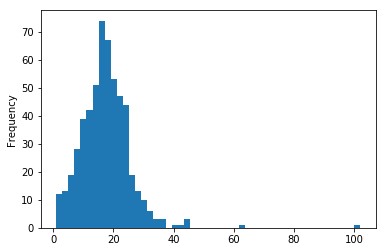

In [18]:
md_rna.groupby(['submitted_subject_id_s']).size().plot.hist(50)

In [23]:
md_rna_subset = md_rna[['submitted_subject_id_s', 'body_site_s']].drop_duplicates()
md_rna_subset.head()

,submitted_subject_id_s,body_site_s
0,GTEX-WEY5,Skin - Sun Exposed (Lower leg)
1,GTEX-SUCS,Testis
2,GTEX-SUCS,Thyroid
4,GTEX-WFG8,Stomach
5,GTEX-WFG8,Esophagus - Mucosa


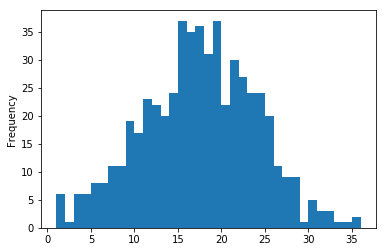

In [35]:
md_rna_subset.groupby(['submitted_subject_id_s']).size().plot.hist(35)

In [29]:
# Total number of points

In [26]:
from scipy.misc import comb 

In [33]:
md_rna_subset.groupby(['submitted_subject_id_s']).size().apply(lambda x: comb(x, 2)).sum().astype(int)

/opt/modules/i12g/anaconda/3-5.0.1/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  if __name__ == '__main__':


86082

In [25]:
md.iloc[0]

Assay_Type_s                                                    RNA-Seq
AssemblyName_s                                                      NaN
AvgSpotLen_l                                                        101
BioSample_s                                                SAMN03878238
Center_Name_s                                       THE BROAD INSTITUTE
Experiment_s                                                 SRX1124996
InsertSize_l                                                          0
Instrument_s                                             Illumina MiSeq
LibraryLayout_s                                                  PAIRED
LibrarySelection_s                                                  PCR
LibrarySource_s                                          TRANSCRIPTOMIC
Library_Name_s                                                      NaN
LoadDate_s                                                   2015-09-11
MBases_l                                                        

In [23]:
md.head()

,Assay_Type_s,AssemblyName_s,AvgSpotLen_l,BioSample_s,Center_Name_s,Experiment_s,InsertSize_l,Instrument_s,LibraryLayout_s,LibrarySelection_s,...,work_request_s,BioProject_s,Consent_s,Organism_s,Platform_s,SRA_Study_s,biospecimen_repository_s,gap_accession_s,study_design_s,study_name_s
0,RNA-Seq,NaN,101,SAMN03878238,THE BROAD INSTITUTE,SRX1124996,0,Illumina MiSeq,PAIRED,PCR,...,NaN,PRJNA75899,GRU,Homo sapiens,ILLUMINA,SRP012682,GTEx,phs000424,Cross-Sectional,Genotype-Tissue Expression (GTEx)
1,RNA-Seq,NaN,121,SAMN03877803,THE BROAD INSTITUTE,SRX1124995,0,Illumina MiSeq,PAIRED,PCR,...,NaN,PRJNA75899,GRU,Homo sapiens,ILLUMINA,SRP012682,GTEx,phs000424,Cross-Sectional,Genotype-Tissue Expression (GTEx)
2,RNA-Seq,NaN,103,SAMN03877676,THE BROAD INSTITUTE,SRX1124994,0,Illumina MiSeq,PAIRED,PCR,...,NaN,PRJNA75899,GRU,Homo sapiens,ILLUMINA,SRP012682,GTEx,phs000424,Cross-Sectional,Genotype-Tissue Expression (GTEx)
3,RNA-Seq,NaN,119,SAMN03877663,THE BROAD INSTITUTE,SRX1124993,0,Illumina MiSeq,PAIRED,PCR,...,NaN,PRJNA75899,GRU,Homo sapiens,ILLUMINA,SRP012682,GTEx,phs000424,Cross-Sectional,Genotype-Tissue Expression (GTEx)
4,RNA-Seq,NaN,117,SAMN03878267,THE BROAD INSTITUTE,SRX1125005,0,Illumina MiSeq,PAIRED,PCR,...,NaN,PRJNA75899,GRU,Homo sapiens,ILLUMINA,SRP012682,GTEx,phs000424,Cross-Sectional,Genotype-Tissue Expression (GTEx)
